# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Solução do problema com dependência do statsmodels

In [1]:
!pip install scipy==1.2 --upgrade

     |████████████████████████████████| 26.6 MB 1.5 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.2.25 requires scipy>=1.2.1, but you have scipy 1.2.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Importe o dataset

In [3]:
dados = pd.read_csv('dados_projeto.csv', sep=';')

### Visualize o conteúdo do DataFrame

In [4]:
dados.head()

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


In [5]:
dados.shape

(365, 2)

### Obtenha e avalie as estatísticas descritivas dos dados

In [6]:
dados.describe()

,Y,X
count,365.000000,365.000000
mean,25401.367123,21.226356
std,4399.142703,3.180108
min,14343.000000,12.900000
25%,22008.000000,19.020000
50%,24867.000000,21.380000
75%,28631.000000,23.280000
max,37937.000000,28.860000


### Análise gráfica
### Construa um box plot para cada variável do dataset

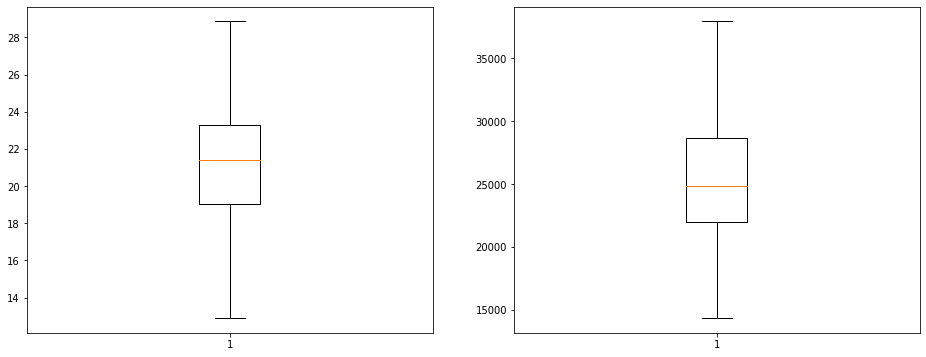

In [7]:
# using the variable axs for multiple Axes
fig, axs = plt.subplots(1, 2,figsize=(16,6))
axs[0].boxplot(dados.X)
axs[1].boxplot(dados.Y)

plt.show()

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

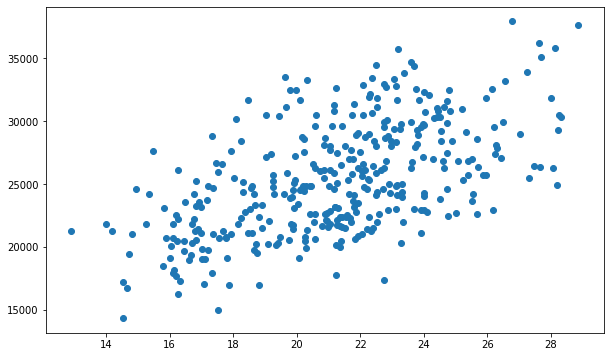

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(dados.X, dados.Y)
plt.show()

### <font color='red'>Utilizando a matriz de correlação</font>

In [9]:
dados.corr()

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.:Existe uma razoável tendência linear entre Y e X.

É possível quantificar a intensidade dessa relação?

Resp.: Através da correlação entre observa-se 57% de correlação entre Y e X. 

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.: Não é possível inferir causalidade apenas com a matriz de correlação.

### Prepare os dados para estimar um modelo de regressão linear simples

In [15]:
Y = dados.Y
X = sm.add_constant(dados.X)
print(X)
print(Y)

     const      X
0      1.0  27.30
1      1.0  27.02
2      1.0  24.82
3      1.0  23.98
4      1.0  23.82
..     ...    ...
360    1.0  24.00
361    1.0  22.64
362    1.0  21.68
363    1.0  21.38
364    1.0  24.76

[365 rows x 2 columns]
0      25461
1      28972
2      30814
3      29799
4      28900
       ...  
360    32307
361    26095
362    22309
363    20467
364    22446
Name: Y, Length: 365, dtype: int64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Estime o modelo de regressão linear simples

In [16]:
regressao_linear = sm.OLS(Y, X).fit()

### Visualize o resultado da regressão

In [17]:
print(regressao_linear.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           1.87e-33
Time:                        16:37:34   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

### Obtenha o $Y$ previsto

In [18]:
dados['y_previsto'] = regressao_linear.predict()

In [19]:
dados.head()

,Y,X,y_previsto
0,25461,27.30,30229.200544
1,28972,27.02,30006.633434
2,30814,24.82,28257.891852
3,29799,23.98,27590.190521
4,28900,23.82,27463.009315


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [37]:
regressao_linear.predict([1,42])[0]

41913.97383816628

OU

In [22]:
intercepto, coeficiente = regressao_linear.params
def previsao(x):
  return intercepto + coeficiente * x

In [23]:
previsao(42)

41913.97383816628

### Obtenha os resíduos da regressão

In [25]:
dados['u'] = regressao_linear.resid
dados.head()

,Y,X,y_previsto,u
0,25461,27.30,30229.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148
3,29799,23.98,27590.190521,2208.809479
4,28900,23.82,27463.009315,1436.990685


### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

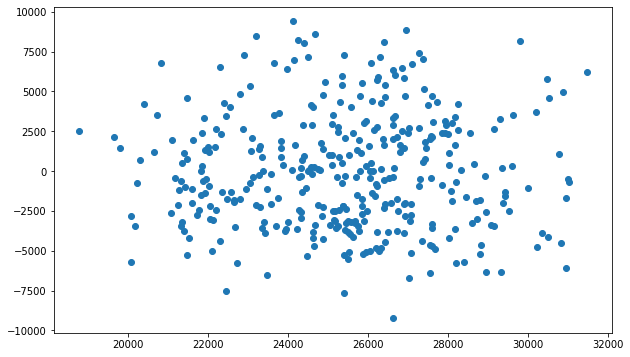

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(x=dados.y_previsto, y = dados.u)
plt.show()

### Obtenha o QQPlot dos resíduos

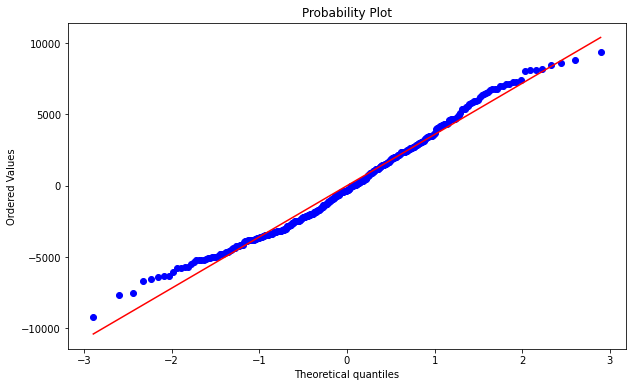

In [36]:
from scipy.stats import probplot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
(_, (_,_,_)) = probplot(dados.u, plot=plt)
plt.show()

### <font color='red'>A partir dos outputs acima, qual conclusão podemos tirar sobre o comportamento dos resíduos?</font>

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

In [32]:
SQR = dados.y_previsto.apply(lambda y: (y - dados.Y.mean())**2).sum()
SQR

2325899486.7377872

In [33]:
SQT = dados.Y.apply(lambda y: (y - dados.Y.mean())**2).sum()
SQT

7044294174.805479

In [34]:
R2 = SQR / SQT
R2

0.33018204933243217